In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 

In [2]:
df1 = pd.read_csv("combined_data.csv")
df2 = pd.read_csv("spam.csv")
df3 = pd.read_csv("spam_ham_dataset.csv")
df4 = pd.read_csv("email.csv")

In [3]:
df1 = df1.replace({1:"ham",0:"spam"})
df1 = df1.rename(columns={"text" : "Message","label":"Category"})
df1.head()

,Category,Message
0,ham,ounce feather bowl hummingbird opec moment ala...
1,ham,wulvob get your medircations online qnb ikud v...
2,spam,computer connection from cnn com wednesday es...
3,ham,university degree obtain a prosperous future m...
4,spam,thanks for all your answers guys i know i shou...


In [4]:
df2.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df3 = df3.rename(columns={"text" : "Message","label":"Category"})
df3 = df3.drop(columns = ["Unnamed: 0","label_num"])
df3.head()

,Category,Message
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [6]:
df4 = df4.rename(columns={"text" : "Message","spam":"Category"})
df4 = df4.replace({1:"ham",0:"spam"})
df4.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df = pd.concat([df1,df2,df3,df4], ignore_index=True, sort=False)
df.head()

,Category,Message
0,ham,ounce feather bowl hummingbird opec moment ala...
1,ham,wulvob get your medircations online qnb ikud v...
2,spam,computer connection from cnn com wednesday es...
3,ham,university degree obtain a prosperous future m...
4,spam,thanks for all your answers guys i know i shou...


In [8]:
df.size

199528

In [9]:
df.shape

(99764, 2)

In [10]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [11]:
df["Category"].value_counts()

Category
ham               57232
spam              42531
{"mode":"full"        1
Name: count, dtype: int64

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmetizer = WordNetLemmatizer()

In [13]:
metric = pd.DataFrame(columns=["Model","Accuracy","Precision","Recall"])
models = []
accuracy_all = []
precision_all = []
recall_all = []

# Lemmetization

In [14]:
import re
corpus = []

stop_words = set(stopwords.words('english'))  # Load once, not inside loop

def clean_text(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)  # Fix: 'A-z' also matches special chars
    text = text.lower()
    words = text.split()
    words = [lemmetizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

corpus = df["Message"].apply(clean_text).tolist()

In [15]:
df.columns

Index(['Category', 'Message'], dtype='object')

# Model : Bag Of Words 

In [16]:
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer(max_features=3000, binary=True)
X = cv.fit_transform(corpus).toarray()

In [17]:
X.shape


(99764, 3000)

In [18]:
y = pd.get_dummies(df["Category"])
y = y.iloc[:,1].values

In [19]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
from sklearn.model_selection import cross_val_score, train_test_split ,KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,precision_score, recall_score

model = MultinomialNB()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(model, X, y, cv=kf)
print(cross_val_results)

[0.87911592 0.87620909 0.87746204 0.87721145 0.87409783]


<Axes: >

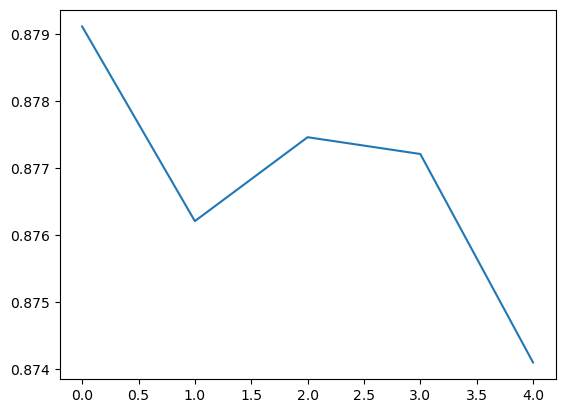

In [21]:
import seaborn as sns 
sns.lineplot(cross_val_results)

In [22]:
from sklearn.model_selection import cross_val_score, train_test_split ,KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score

model = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.86      0.89     11499
        True       0.83      0.90      0.86      8454

    accuracy                           0.88     19953
   macro avg       0.88      0.88      0.88     19953
weighted avg       0.88      0.88      0.88     19953

Accuracy: 0.8791159224176816


In [23]:
metric.loc[len(metric)] = {"Model": "Bag Of Words","Accuracy": accuracy_score(y_test, y_pred),
                        "Precision": precision_score(y_test, y_pred),
                        "Recall": recall_score(y_test, y_pred)}

In [24]:
metric

,Model,Accuracy,Precision,Recall
0,Bag Of Words,0.879116,0.828942,0.90052


<Axes: >

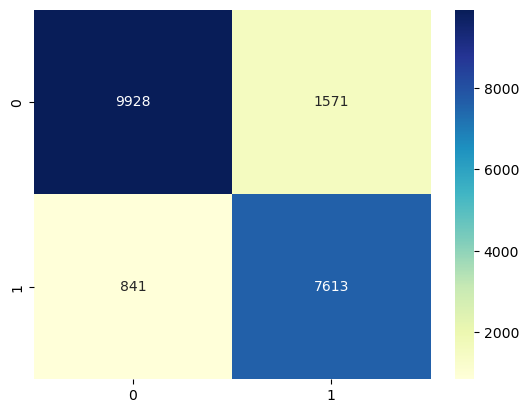

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

# Model of Bag Of Words with Ngrams

In [27]:
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer(max_features=3000, binary=True,ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [28]:
X.shape

(99764, 3000)

In [29]:
y = cv.fit_transform(df["Category"]).toarray()
y = pd.get_dummies(df["Category"])
y = y.iloc[:,1].values

In [30]:
from sklearn.model_selection import cross_val_score, train_test_split ,KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,precision_score, recall_score

model = MultinomialNB()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(model, X, y, cv=kf)
print(cross_val_results)

[0.87846439 0.87676039 0.87666015 0.87555756 0.87254411]


<Axes: >

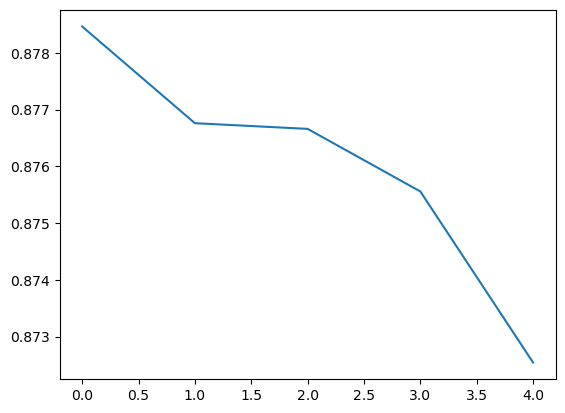

In [31]:
sns.lineplot(cross_val_results)

In [32]:
len(y)

99764

In [33]:
len(X)


99764

In [34]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score


model = MultinomialNB()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [35]:
metric.loc[len(metric)] = {"Model": "Bag Of Words with Ngram","Accuracy": accuracy_score(y_test, y_pred),
                        "Precision": precision_score(y_test, y_pred),
                        "Recall": recall_score(y_test, y_pred)}

In [36]:
metric 

,Model,Accuracy,Precision,Recall
0,Bag Of Words,0.879116,0.828942,0.900520
1,Bag Of Words with Ngram,0.878464,0.860371,0.851313


<Axes: >

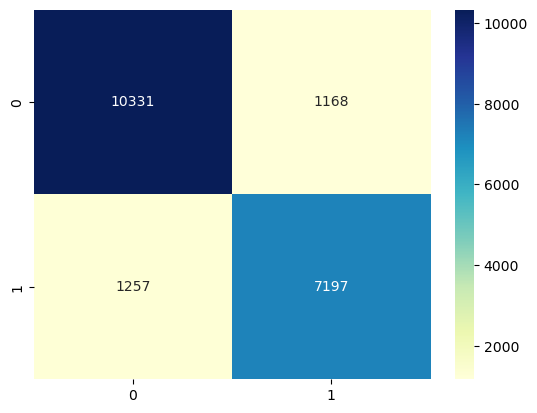

In [37]:
sns.heatmap(
    confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu'
)

# Model for tf-idf with ngram

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=3000, binary=True, ngram_range=(1,3))
X = tv.fit_transform(corpus).toarray()

[0.8773618  0.87330226 0.87625921 0.8745552  0.86838412]


<Axes: >

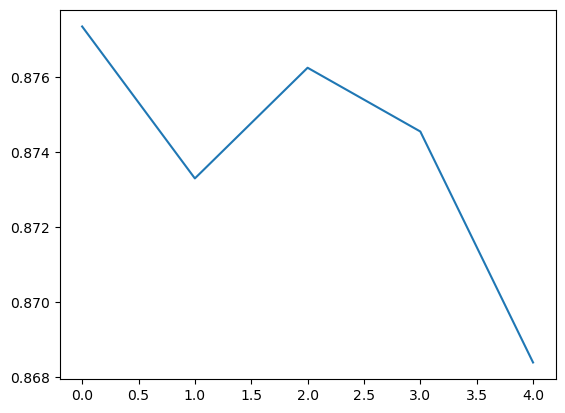

In [39]:
from sklearn.model_selection import cross_val_score, train_test_split ,KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score

model = MultinomialNB()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(model, X, y, cv=kf)
print(cross_val_results)
sns.lineplot(cross_val_results)

In [40]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

       False       0.93      0.86      0.90     12424
        True       0.80      0.90      0.85      7529

    accuracy                           0.88     19953
   macro avg       0.87      0.88      0.87     19953
weighted avg       0.88      0.88      0.88     19953



In [41]:
metric.loc[len(metric)] = {"Model": "TF-IDF","Accuracy": accuracy_score(y_test, y_pred),
                        "Precision": precision_score(y_test, y_pred),
                        "Recall": recall_score(y_test, y_pred)}
metric

,Model,Accuracy,Precision,Recall
0,Bag Of Words,0.879116,0.828942,0.900520
1,Bag Of Words with Ngram,0.878464,0.860371,0.851313
2,TF-IDF,0.877362,0.898924,0.800568


<Axes: >

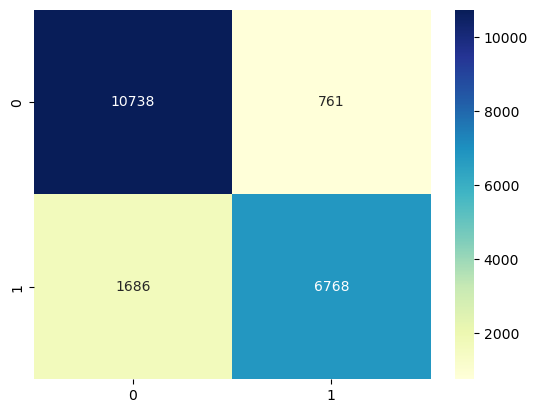

In [42]:
sns.heatmap(
    confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu'
)

# Model with word2vec using gensim

In [43]:
from nltk import sent_tokenize
import gensim
from gensim.utils import simple_preprocess

In [44]:
words = []
for i in corpus:
    sent_token = sent_tokenize(i)
    #i.tolower() or 
    for i in sent_token:
        words.append(simple_preprocess(i))

In [45]:
model = gensim.models.Word2Vec(words,window=5,min_count=2)
model.wv.index_to_key[0]

'escapenumber'

In [46]:
model.corpus_count

99728

In [47]:
X = model.wv.vectors
X = np.array(X)
X

array([[ 1.4927375e+00, -5.1969606e-01,  2.5241714e+00, ...,
        -1.2028697e+00, -8.4705406e-01,  1.9109553e+00],
       [ 1.2678981e+00, -6.6114259e-01,  2.5744035e+00, ...,
        -1.0112724e+00,  8.8586426e-01,  3.0884078e+00],
       [ 1.2703102e+00, -2.2149611e+00, -3.2049718e+00, ...,
         2.6562650e+00,  4.3385735e+00,  1.2357870e+00],
       ...,
       [-1.1219207e-02,  9.6987495e-03,  3.1189442e-02, ...,
        -5.1830646e-02, -3.9499346e-03, -1.5231297e-02],
       [ 6.3238658e-02, -4.1373726e-02,  1.2069885e-02, ...,
         8.4342025e-03, -1.6444558e-02,  1.9441976e-03],
       [ 2.4263838e-03,  3.8688339e-02,  3.8841080e-02, ...,
         1.1539274e-02,  5.7745825e-02,  9.9884197e-03]], dtype=float32)

In [48]:
len(y)

99764

In [49]:
len(X)


140567

In [50]:
from sklearn.model_selection import cross_val_score, train_test_split ,KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,precision_score, recall_score

model = MultinomialNB()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.93      0.86      0.90     12424
        True       0.80      0.90      0.85      7529

    accuracy                           0.88     19953
   macro avg       0.87      0.88      0.87     19953
weighted avg       0.88      0.88      0.88     19953



In [51]:
metric.loc[len(metric)] = {"Model": "Word2Vec","Accuracy": accuracy_score(y_test, y_pred),
                        "Precision": precision_score(y_test, y_pred),
                        "Recall": recall_score(y_test, y_pred)}
metric

,Model,Accuracy,Precision,Recall
0,Bag Of Words,0.879116,0.828942,0.900520
1,Bag Of Words with Ngram,0.878464,0.860371,0.851313
2,TF-IDF,0.877362,0.898924,0.800568
3,Word2Vec,0.877362,0.898924,0.800568


# Visualizing the results

<Axes: xlabel='Model', ylabel='Accuracy'>

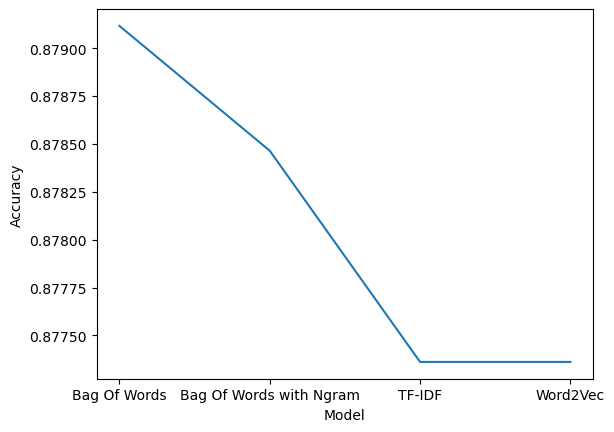

In [52]:
sns.lineplot(x=metric["Model"], y=metric["Accuracy"])

# Precision plot

<Axes: xlabel='Model', ylabel='Precision'>

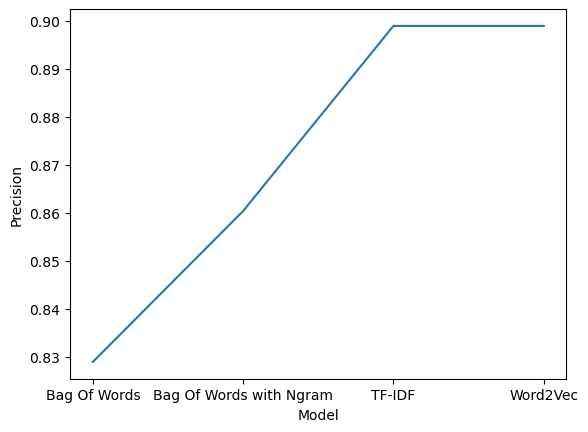

In [53]:
sns.lineplot(x=metric["Model"], y=metric["Precision"])

# Recall 

<Axes: xlabel='Model', ylabel='Recall'>

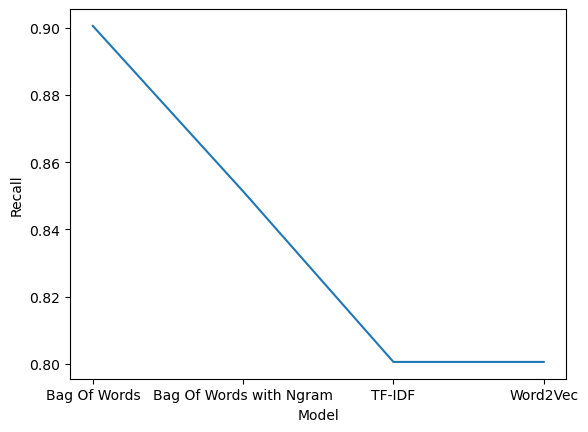

In [54]:
sns.lineplot(x=metric["Model"], y=metric["Recall"])